# Cleaning `condition` feature

Notebook used for cleaning and visualizing the `condition` column in the Drug Review dataset.

First, installation of `pyxet` and other dependencies:

In [1]:
%pip install pyxet
%pip install polars
%pip install pandas
%pip install numpy
%pip install pyarrow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pyxet         # make xet:// protocol available   
import pandas as pd 
import polars as pl  # faster alternative to pandas
import numpy as np
import pyarrow
import matplotlib.pyplot as plt

fs = pyxet.XetFS()

# Drug Review Dataset (UCI)

In [3]:
# get the drug training and testing data
df_drugs_train = pl.read_csv('xet://drug_data/drugsComTrain_raw.tsv', separator = '\t')
df_drugs_test = pl.read_csv('xet://drug_data/drugsComTest_raw.tsv', separator = '\t')
print(df_drugs_train.head())

shape: (5, 7)
┌────────┬────────────────┬────────────────┬────────────────┬────────┬───────────────┬─────────────┐
│        ┆ drugName       ┆ condition      ┆ review         ┆ rating ┆ date          ┆ usefulCount │
│ ---    ┆ ---            ┆ ---            ┆ ---            ┆ ---    ┆ ---           ┆ ---         │
│ i64    ┆ str            ┆ str            ┆ str            ┆ f64    ┆ str           ┆ i64         │
╞════════╪════════════════╪════════════════╪════════════════╪════════╪═══════════════╪═════════════╡
│ 206461 ┆ Valsartan      ┆ Left           ┆ "It has no     ┆ 9.0    ┆ May 20, 2012  ┆ 27          │
│        ┆                ┆ Ventricular    ┆ side effect, I ┆        ┆               ┆             │
│        ┆                ┆ Dysfunction    ┆ take i…        ┆        ┆               ┆             │
│ 95260  ┆ Guanfacine     ┆ ADHD           ┆ "My son is     ┆ 8.0    ┆ April 27,     ┆ 192         │
│        ┆                ┆                ┆ halfway        ┆        ┆ 2010  

In [4]:
# get the shape of our data
print("Training Data shape: {}".format(df_drugs_train.shape))
print("Testing Data shape: {}".format(df_drugs_test.shape))

Training Data shape: (161297, 7)
Testing Data shape: (53766, 7)


## `condition` column

### Training Data

In [5]:
df_drugs_train["condition"].describe()

statistic,value
str,i64
"""count""",161297
"""null_count""",899
"""unique""",885


In [6]:
# fill missing values with "not_reported"
df_filled = df_drugs_train.with_columns(
    pl.col("condition").fill_null(pl.lit("not_reported")),
)

# check if we no longer have null values
print(df_filled.null_count())

shape: (1, 7)
┌─────┬──────────┬───────────┬────────┬────────┬──────┬─────────────┐
│     ┆ drugName ┆ condition ┆ review ┆ rating ┆ date ┆ usefulCount │
│ --- ┆ ---      ┆ ---       ┆ ---    ┆ ---    ┆ ---  ┆ ---         │
│ u32 ┆ u32      ┆ u32       ┆ u32    ┆ u32    ┆ u32  ┆ u32         │
╞═════╪══════════╪═══════════╪════════╪════════╪══════╪═════════════╡
│ 0   ┆ 0        ┆ 0         ┆ 0      ┆ 0      ┆ 0    ┆ 0           │
└─────┴──────────┴───────────┴────────┴────────┴──────┴─────────────┘


In [7]:
# set the number of rows we want to see
pl.Config.set_tbl_rows(100)

# get only the condition column
print(df_filled.select("condition").unique())

shape: (885, 1)
┌───────────────────────────────────┐
│ condition                         │
│ ---                               │
│ str                               │
╞═══════════════════════════════════╡
│ Diarrhea                          │
│ Thromboembolic Stroke Prophylaxi… │
│ Systemic Mastocytosis             │
│ Nasal Congestion                  │
│ Peripheral Arterial Disease       │
│ mulation) (phenylephrine)         │
│ Wolff-Parkinson-White Syndrome    │
│ Cataplexy                         │
│ Hepatic Tum                       │
│ Dry Eye Disease                   │
│ ADHD                              │
│ Myeloproliferative Disorders      │
│ Gouty Arthritis                   │
│ Subarachnoid Hemorrhage           │
│ Osteolytic Bone Metastases of So… │
│ Paget's Disease                   │
│ Chronic Lymphocytic Leukemia      │
│ Cardiovascular Risk Reduction     │
│ Scabies                           │
│ Nephrocalcinosis                  │
│ Lyme Disease, Neurologic        

There are many entries with html tags like `</span>` inside, which should not be showing up in our data.

In [8]:
# removing html tags
df_condition = df_filled.filter(~pl.col("condition").str.contains("</span>"))


(array([6.8706e+04, 3.4865e+04, 1.9948e+04, 1.2270e+04, 7.7870e+03,
        5.4130e+03, 3.5430e+03, 2.3550e+03, 1.7390e+03, 1.2150e+03,
        8.4500e+02, 5.6100e+02, 4.6600e+02, 3.3600e+02, 2.7500e+02,
        1.8000e+02, 1.5500e+02, 1.1100e+02, 1.0300e+02, 6.1000e+01,
        6.2000e+01, 4.1000e+01, 4.1000e+01, 3.1000e+01, 3.3000e+01,
        2.2000e+01, 2.4000e+01, 1.1000e+01, 1.4000e+01, 4.0000e+00,
        1.2000e+01, 8.0000e+00, 5.0000e+00, 3.0000e+00, 6.0000e+00,
        6.0000e+00, 4.0000e+00, 4.0000e+00, 2.0000e+00, 5.0000e+00,
        4.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 4.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.00

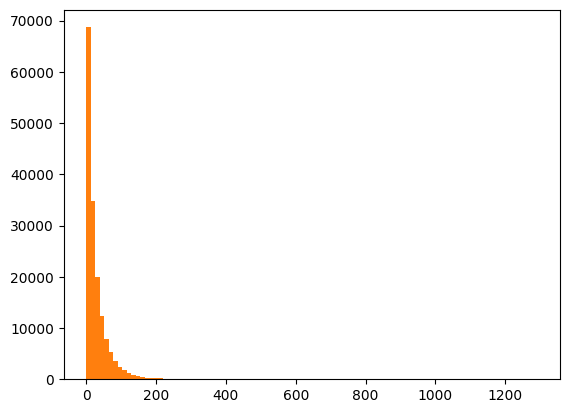

In [9]:
# df_drugs_train.dtypes  #= [Int64, String, String, String, Float64, String, Int64]
df_drugs_train.describe()
df_drugs_train.select(pl.all().is_null().sum())

#df_drugs_train.select(['rating']).unique()
# for cond in df_drugs_train.select(['condition']).unique()['condition']:
#     print(cond)
# for drug in df_drugs_train.select(['drugName']).unique()['drugName']:
#     print(drug)
# for rev in df_drugs_train.select(['review']).unique()['review'][0:20]:
#     print(rev)

review_word_count = df_drugs_train.select(['review']).map_rows(lambda t: len(t[0].split(" ")))
#plt.hist(review_word_count)
review_word_count.describe()
plt.hist(df_drugs_train['rating'], bins = 10)
plt.hist(df_drugs_train['usefulCount'], bins = 100)
#df_drugs_train.select(['usefulCount']).unique()


In [10]:
print("garbage")

garbage


Getting the basic descriptive stats, data types, etc.

In [11]:
# Get descripive stats
df_drugs_train.describe()

describe,,drugName,condition,review,rating,date,usefulCount
str,f64,str,str,str,f64,str,f64
"""count""",161297.0,"""161297""","""161297""","""161297""",161297.0,"""161297""",161297.0
"""null_count""",0.0,"""0""","""899""","""0""",0.0,"""0""",0.0
"""mean""",115923.585305,null,null,null,6.994377,null,28.004755
"""std""",67004.44517,null,null,null,3.272329,null,36.403742
"""min""",2.0,"""A + D Cracked …","""0</span> users…",""""" please t…",1.0,"""April 1, 2008""",0.0
"""25%""",58063.0,null,null,null,5.0,null,6.0
"""50%""",115744.0,null,null,null,8.0,null,16.0
"""75%""",173776.0,null,null,null,10.0,null,36.0
"""max""",232291.0,"""femhrt""","""zen Shoulde""","""""❤️❤️❤️ Cialis…",10.0,"""September 9, 2…",1291.0


In [12]:
# get column names and their dtypes
df_drugs_train.schema

OrderedDict([('', Int64),
             ('drugName', Utf8),
             ('condition', Utf8),
             ('review', Utf8),
             ('rating', Float64),
             ('date', Utf8),
             ('usefulCount', Int64)])

In [13]:
# check if all the rows are unique 
print(df_drugs_train.is_unique().all())

True


In [14]:
# check for nulls
df_drugs_train.null_count()

,drugName,condition,review,rating,date,usefulCount
u32,u32,u32,u32,u32,u32,u32
0,0,899,0,0,0,0


Since there are over 800 `null` values in `condition`, let's take a closer look. This column represents the medical conditions of respondents, so we cannot just drop those. Instead, we fill with `not_reported`. This ensures no null values.

In [15]:
# fill missing values with "not_reported"
df_filled = df_drugs_train.with_columns(
    pl.col("condition").fill_null(pl.lit("not_reported")),
)

# check if we no longer have null values
print(df_filled.null_count())

shape: (1, 7)
┌─────┬──────────┬───────────┬────────┬────────┬──────┬─────────────┐
│     ┆ drugName ┆ condition ┆ review ┆ rating ┆ date ┆ usefulCount │
│ --- ┆ ---      ┆ ---       ┆ ---    ┆ ---    ┆ ---  ┆ ---         │
│ u32 ┆ u32      ┆ u32       ┆ u32    ┆ u32    ┆ u32  ┆ u32         │
╞═════╪══════════╪═══════════╪════════╪════════╪══════╪═════════════╡
│ 0   ┆ 0        ┆ 0         ┆ 0      ┆ 0      ┆ 0    ┆ 0           │
└─────┴──────────┴───────────┴────────┴────────┴──────┴─────────────┘


### Testing Data